<a href="https://colab.research.google.com/github/kimdahyeon977/R-studio/blob/master/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5%EA%B3%BC%EC%A0%9C_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier

#데이터 읽어온후 split하기

In [2]:
np.random.seed(109)
digits = load_digits()
X_train=digits.data[:1601]
y_train=digits.target[:1601]

X_test=digits.data[1601:]
y_test=digits.target[1601:]

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

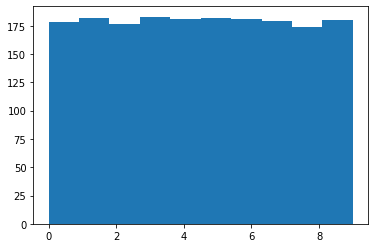

In [3]:
plt.hist(digits.target)

###(1) MLPCLassifier

In [4]:
clf=MLPClassifier(hidden_layer_sizes=(100,100))
clf.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 100))

In [5]:
from sklearn.metrics import accuracy_score
result=clf.predict(X_test)
print(accuracy_score(result,y_test))

0.9285714285714286


###결과

In [6]:
from sklearn.metrics import classification_report

print(classification_report(result, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.95      0.86      0.90        22
           2       0.94      0.94      0.94        17
           3       0.73      1.00      0.84        16
           4       0.86      1.00      0.93        19
           5       1.00      0.86      0.93        22
           6       1.00      1.00      1.00        22
           7       1.00      0.95      0.98        21
           8       0.88      0.75      0.81        20
           9       0.95      0.95      0.95        20

    accuracy                           0.93       196
   macro avg       0.93      0.93      0.93       196
weighted avg       0.94      0.93      0.93       196



###(2) 다층 퍼셉트론 분류 모델

In [7]:
X_train, X_test= X_train/255, X_test/255

In [18]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')


])
opt = tf.keras.optimizers.Adam(lr = 0.01, beta_1 = 0.9, beta_2 = 0.999)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [19]:
model.compile(optimizer = opt,
                       loss = 'sparse_categorical_crossentropy',
                       metrics = ['accuracy', 'sparse_categorical_crossentropy'])

In [20]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 500, 
                              validation_data = (X_test, y_test), verbose = 2)

Epoch 1/50
4/4 - 1s - loss: 2.2625 - accuracy: 0.2961 - sparse_categorical_crossentropy: 2.2625 - val_loss: 2.1138 - val_accuracy: 0.5816 - val_sparse_categorical_crossentropy: 2.1138 - 657ms/epoch - 164ms/step
Epoch 2/50
4/4 - 0s - loss: 1.9964 - accuracy: 0.6021 - sparse_categorical_crossentropy: 1.9964 - val_loss: 1.7106 - val_accuracy: 0.6939 - val_sparse_categorical_crossentropy: 1.7106 - 50ms/epoch - 13ms/step
Epoch 3/50
4/4 - 0s - loss: 1.5072 - accuracy: 0.7570 - sparse_categorical_crossentropy: 1.5072 - val_loss: 1.2119 - val_accuracy: 0.7398 - val_sparse_categorical_crossentropy: 1.2119 - 53ms/epoch - 13ms/step
Epoch 4/50
4/4 - 0s - loss: 0.9680 - accuracy: 0.8095 - sparse_categorical_crossentropy: 0.9680 - val_loss: 0.8878 - val_accuracy: 0.8010 - val_sparse_categorical_crossentropy: 0.8878 - 51ms/epoch - 13ms/step
Epoch 5/50
4/4 - 0s - loss: 0.6190 - accuracy: 0.8620 - sparse_categorical_crossentropy: 0.6190 - val_loss: 0.7651 - val_accuracy: 0.7959 - val_sparse_categorical

In [21]:
scores = model.evaluate(X_test, y_test)
print('\naccuracy: ', scores[1])

7/7 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.9286 - sparse_categorical_crossentropy: 0.4516

accuracy:  0.9285714030265808


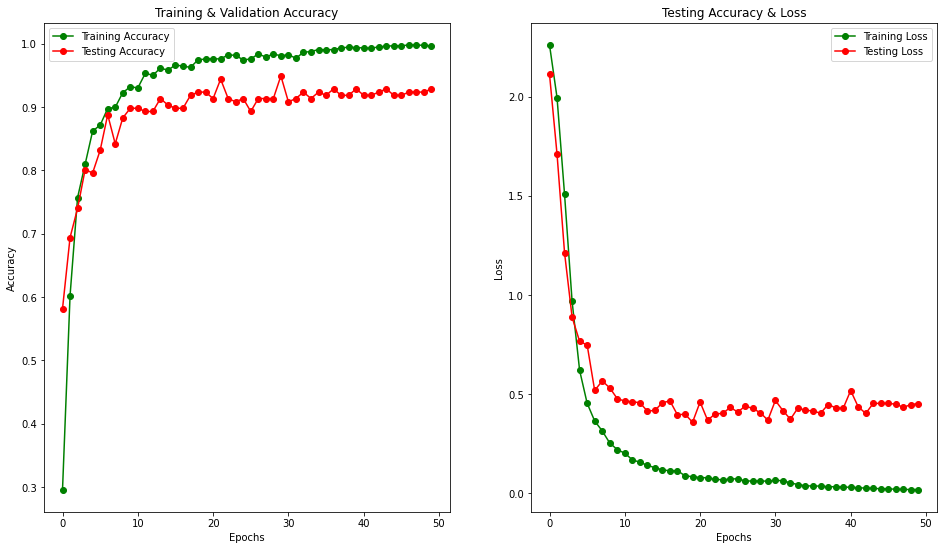

In [22]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

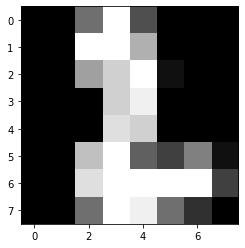

Label:  2
Prediction:  2


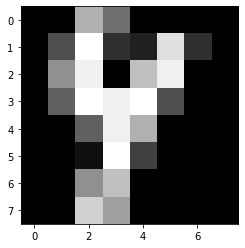

Label:  4
Prediction:  8


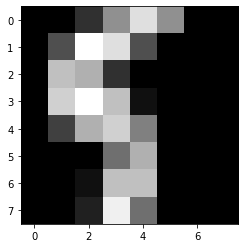

Label:  5
Prediction:  5


In [17]:
predictions = model.predict(X_test)
rand_n = np.random.randint(100, size=3)
    
for i in rand_n:
        img = X_test[i].reshape(8,8)
        plt.imshow(img,cmap="gray")
        plt.show()
        
        print("Label: ", y_test[i])
        print("Prediction: ", np.argmax(predictions[i]))
